# Leren: Programming assignment 3
** This assignment can be done in teams of 2 **

**Student 1:**  <span style="color:red">Name Lastname</span> (<span style="color:red">student_id</span>)<br>
**Student 2:** <span style="color:red">Name Lastname</span> (<span style="color:red">student_id</span>)<br>

-----------------------------------
This notebook provides a template for your programming assignment 3. You may want to use parts of your code from the previous assignment(s) as a starting point for this assignment. 

The code you hand-in should follow the structure from this document. Each part of the assignment has its own cell, you are free to add more cells. Note that the structure corresponds with the structure from the actual programming assignment. Make sure you read this for the full explanation of what is expected of you.

**Submission:**

* Make sure your code can be run from top to bottom without errors.
* Include your data files in the zip file.
* Comment your code

One way be sure you code can be run without errors is by quiting iPython completely and then restart iPython and run all cells again (you can do this by going to the menu bar above: Cell > Run all). This way you make sure that no old definitions of functions or values of variables are left (that your program might still be using).

-----------------------------------

If you have any questions ask your teaching assistent. We are here for you.

-----------------------------------

## Regularized Logistic Regression
a) Implementation

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as linalg
import scipy.ndimage
import math

def readData():
    data = np.loadtxt('digits123.csv', delimiter=',');
    return data

In [6]:
# hypothesis function for logistic regression
def hypothesis(thetas, x):
    return 1.0 / (1.0 + np.exp(-np.dot(thetas, x)))


# gradient and parameter updating
def updateLog(X, Y, Thetas, alpha):
    m = len(X)
    n = len(Thetas)
    
    new_thetas = np.zeros(n) 
    theta_temp = np.zeros(m)
    
        
    # loop over training examples
    for i in range(m):

        # loop over thetas/features
        for j in range(n):
            theta_temp[i] = 1.0 / (1.0 + np.exp(-np.sum(Thetas[:n] * X[i,:n]))) - Y[i]
        
    new_thetas = Thetas - alpha * 1/m * np.dot(X.T,theta_temp[:, np.newaxis])
        
    return new_thetas[:,0]

In [7]:
# cost function for logistic regression
def calcCostLog(thetas, X, Y):
    m = len(X)
    cost_sum = 0.0
    
    for i in range(m):
        if Y[i] > 0:
            cost_sum += math.log(hypothesis(thetas,X[i]))
        else:
            cost_sum += math.log(1 - hypothesis(thetas,X[i]))
    return -(cost_sum/m)

final cost:  0.674708283978
final thetas: [ 0.01972679 -0.0169288   0.01977535  0.00505484]


<function matplotlib.pyplot.show>

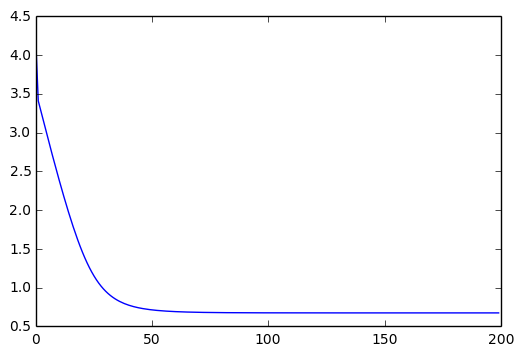

In [8]:
def regressionLog(X, y, alpha, n_iter, thetas):
    cost = []
    # for number of iterations
    while n_iter > 0:
        # calculate cost
        cost.append(calcCostLog(thetas, X, y))
        # update values for theta
        new_thetas = updateLog(X, y, thetas, alpha)
        thetas = new_thetas        
        n_iter -= 1
    
    return new_thetas, cost

# input is data from written assignment
X = np.array([[1,10,4,4],[1,7,3,3],[1,5,4,2],[1,2,3,1]])
Y = np.array([0,0,1,1])
thetas = np.array([0.5,0.5,0.5,0.5])

new_thetas, cost = regressionLog(X, Y, 0.03, 200, thetas)
print "final cost: ", cost[-1]
print "final thetas:",new_thetas
plt.plot(cost)
plt.show

b) Two small datasets

**Discussion:**

[You discussion comes here]

-----------------------------------

## 2) Neural Network


a) Forward Propagation

b) Backpropagation on two logistic units

c) Complete backpropagation on handwritten digit recognition

**Discussion:**

[You discussion comes here]

-----------------------------------